# <font color ='purple'>Let's start by Importing the required libraries </font>

In [3]:

import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
print(os.listdir("chest_xray"))
import tensorflow as tf
# Keras Libraries


from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

['__MACOSX', 'chest_xray', 'val', 'test', 'train']


Using TensorFlow backend.


In [4]:
mainDIR = os.listdir('chest_xray/chest_xray')
print(mainDIR)

['.DS_Store', 'val', 'test', 'train']


In [5]:
train_folder= 'chest_xray/chest_xray/train/'
val_folder = 'chest_xray/chest_xray/val/'
test_folder = 'chest_xray/chest_xray/test/'



## Let's set up the training and testing folders.


In [6]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'covid/'


## Let's take a look at some of the pictures.



26
normal picture title:  IM-0154-0001.jpeg
covid picture title: 60a4164955bda9af96ecebdfca1139_thumb.jpeg


Text(0.5, 1.0, 'covid')

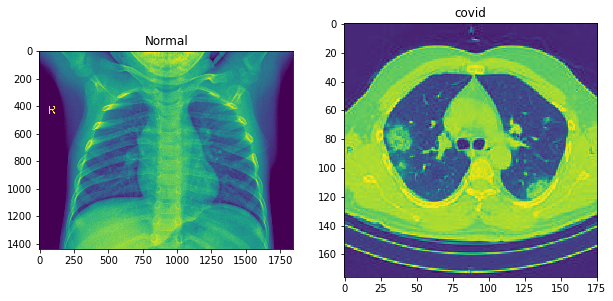

In [7]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#covid
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('covid picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('covid')

In [8]:
# let's build the CNN model

cnn = Sequential()

#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






# <font color='purple'>Now, we are going to fit the model to our training dataset and we will keep out testing dataset seperate </font>

In [9]:
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('chest_xray/chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('chest_xray/chest_xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 75 images belonging to 2 classes.
Found 35 images belonging to 2 classes.
Found 62 images belonging to 2 classes.


# This summary is a great way for us to see how our CNN is being set up

In [10]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [16]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 163,
                         epochs = 5,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/5
163/163 [==============================] - 179s 1s/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 1.0616e-05 - val_accuracy: 1.0000
Epoch 2/5
163/163 [==============================] - 173s 1s/step - loss: 0.0293 - accuracy: 0.9892 - val_loss: 7.3492e-04 - val_accuracy: 1.0000
Epoch 3/5
163/163 [==============================] - 184s 1s/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 1.0652e-08 - val_accuracy: 1.0000
Epoch 4/5
163/163 [==============================] - 179s 1s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 5.8250e-06 - val_accuracy: 1.0000
Epoch 5/5
163/163 [==============================] - 176s 1s/step - loss: 6.4036e-04 - accuracy: 1.0000 - val_loss: 2.0916e-05 - val_accuracy: 1.0000


In [17]:
test_accu = cnn.evaluate_generator(test_set,steps=624)

In [18]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 85.48387289047241 %


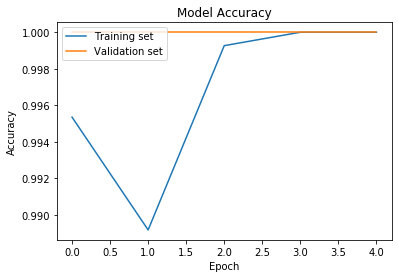

In [19]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

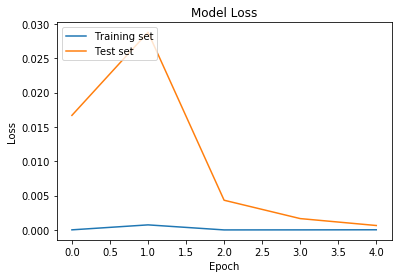

In [20]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [25]:
from keras.models import load_model

cnn.save('myCovid_model.h5')  


In [26]:
from keras import backend as K
# This line must be executed before loading Keras model.
K.set_learning_phase(0)

In [27]:
from keras.models import load_model
model = load_model('myCovid_model.h5')
print(model.outputs)
print(model.inputs)

[<tf.Tensor 'dense_2_1/Sigmoid:0' shape=(None, 1) dtype=float32>]
[<tf.Tensor 'conv2d_1_input_1:0' shape=(None, 64, 64, 3) dtype=float32>]
